<h1>1. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('preprocessed_data.csv',nrows=100000)

In [3]:
y = data['project_is_approved']  # Binary Class label
X = data.drop(['project_is_approved'],axis=1)  
print(X.shape,y.shape)

(100000, 8) (100000,)


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
from sklearn.model_selection import train_test_split

#splitting data into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33,stratify=y) 

# #spliting train for cross validation
# X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train, test_size=0.33,stratify=y_train)
                    
                            #stratify preserves the same proportion of class in train and test data set.(no baised data set)

In [5]:
print(X_train.shape,X_test.shape)

(67000, 8) (33000, 8)


In [6]:
X_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
20411,mi,mrs,grades_3_5,9,math_science health_sports,health_lifescience health_wellness,my students enjoy engaging activities projects...,639.36
39355,ga,mrs,grades_6_8,5,music_arts,visualarts,my students large range backgrounds home life ...,114.20
91912,ma,mr,grades_9_12,3,math_science,mathematics,north high school urban inner city high school...,116.44
79587,ca,mrs,grades_3_5,12,health_sports specialneeds,health_wellness specialneeds,i wonderful group students free reduced lunch ...,39.94
97345,ny,mr,grades_3_5,16,literacy_language,literacy,my school new initiative incorporate stem real...,217.64


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
#Vecorizing Text data using BOW

vectorizor = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizor.fit(X_train['essay'].values)

X_train_essay = vectorizor.transform(X_train['essay'].values)
X_test_essay = vectorizor.transform(X_test['essay'].values)



In [9]:
#Vecorizing Text data using TF-IDF

vectorizor_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizor_tfidf.fit(X_train['essay'].values)

X_train_tfidf_eassy = vectorizor_tfidf.transform(X_train['essay'].values)
X_test_tfidf_eassy  = vectorizor_tfidf.transform(X_test['essay'].values)

In [10]:
X_train_tfidf_eassy.shape

(67000, 233464)

In [11]:
X_train_essay.shape

(67000, 233464)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [12]:
from sklearn.preprocessing import Normalizer

#Numerical Feature : teacher_number_of_previously_posted_projects

normalizer_posted_proj = Normalizer()

normalizer_posted_proj.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_pre_post = normalizer_posted_proj.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_pre_post = normalizer_posted_proj.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_pre_post.shape

(33000, 1)

In [13]:
#Numerical Feature : price
normalizer_price = Normalizer()

X_train_price = normalizer_price.fit_transform(X_train['price'].values.reshape(-1,1))
X_test_price = normalizer_price.transform(X_test['price'].values.reshape(-1,1))

X_train_price.shape

(67000, 1)

In [14]:
#Categorical Feature : School State

vectorizor_ss = CountVectorizer()
X_train_school = vectorizor_ss.fit_transform(X_train['school_state'].values)
X_test_school = vectorizor_ss.fit_transform(X_test['school_state'].values)

X_train_school.shape

(67000, 51)

In [15]:
#Categorical Feature : teacher_prefix

vectorizor_t_prefix = CountVectorizer()
X_train_teacher_prefix = vectorizor_t_prefix.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizor_t_prefix.transform(X_test['teacher_prefix'].values)

X_train_teacher_prefix.shape

(67000, 5)

In [16]:
#Categorical Feature : project_grade_category

vectorizor_proj_grade = CountVectorizer()
X_train_project_grade = vectorizor_proj_grade.fit_transform(X_train['project_grade_category'].values)
X_test_project_grade = vectorizor_proj_grade.transform(X_test['project_grade_category'].values)

X_train_project_grade.shape

(67000, 4)

In [17]:
#Categorical Feature : clean_categories

vectorizor_clean_cat = CountVectorizer()
X_train_clean_cat = vectorizor_clean_cat.fit_transform(X_train['clean_categories'].values)
X_test_clean_cat = vectorizor_clean_cat.transform(X_test['clean_categories'].values)

X_train_clean_cat.shape

(67000, 9)

In [18]:
#Categorical Feature : clean_subcategories

vectorizor_clean_subcat = CountVectorizer()
X_train_clean_subcat = vectorizor_clean_subcat.fit_transform(X_train['clean_subcategories'].values)
X_test_clean_subcat = vectorizor_clean_subcat.transform(X_test['clean_subcategories'].values)

X_train_clean_subcat.shape

(67000, 30)

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>


<br> SET1(PREPROCESSED EASSY(BOW) + NUMERICAL FEATURES + CATEGORICAL FEATURES)

In [19]:
from scipy.sparse import hstack
        #Stacking all the features 
X_tr = hstack((X_train_essay,X_train_pre_post,X_train_price,X_train_school,X_train_teacher_prefix,X_train_project_grade,X_train_clean_cat,X_train_clean_subcat)).tocsr()
X_te = hstack((X_test_essay,X_test_pre_post,X_test_price,X_test_school,X_test_teacher_prefix,X_test_project_grade,X_test_clean_cat,X_test_clean_subcat)).tocsr()

In [20]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
                                                # Hyperparameter tunnig using RandomizedSearchCV where k = 10folds

NB = MultinomialNB(class_prior=[0.5,0.5])

clf = RandomizedSearchCV(NB, param, cv=10, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf.fit(X_tr,y_train) 

RandomizedSearchCV(cv=10, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
                   n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0005, 0.0001, 0.005,
                                                  0.001, 0.05, 0.01, 0.1, 0.5,
                                                  1, 5, 10, 50, 100]},
                   return_train_score=True, scoring='roc_auc')

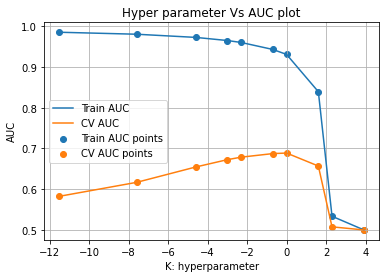

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
8,0.558381,0.033298,0.045311,0.005002,1e-05,{'alpha': 1e-05},0.586392,0.581370,0.586247,0.590123,...,0.985882,0.985406,0.985330,0.984818,0.984869,0.986033,0.985476,0.985762,0.985434,0.000373
5,0.547406,0.027673,0.043752,0.006249,0.0005,{'alpha': 0.0005},0.620758,0.611746,0.619378,0.621248,...,0.981015,0.980439,0.980362,0.979770,0.979975,0.981265,0.980766,0.980938,0.980562,0.000438
3,0.538982,0.019919,0.048440,0.010938,0.01,{'alpha': 0.01},0.665940,0.650831,0.655647,0.658044,...,0.973179,0.972456,0.972515,0.971898,0.972299,0.973570,0.973183,0.973150,0.972780,0.000479
1,0.643150,0.098863,0.091873,0.072886,0.05,{'alpha': 0.05},0.682188,0.669910,0.678412,0.680547,...,0.965474,0.964619,0.964861,0.964071,0.964606,0.965916,0.965676,0.965313,0.965062,0.000541
7,0.556127,0.024583,0.050399,0.009763,0.1,{'alpha': 0.1},0.687706,0.678521,0.681323,0.687178,...,0.960705,0.959831,0.960149,0.959265,0.959898,0.961193,0.961055,0.960552,0.960320,0.000571


In [21]:
import math
import matplotlib.pyplot as plt
 
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K = [math.log(a) for a in results['param_alpha']]

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [22]:
best_param = clf.best_params_ #BEST HYPER PARAMETER
best_param

{'alpha': 1}

In [23]:

NB = MultinomialNB(alpha = best_param['alpha'],class_prior=[0.5,0.5]) #Applying NB with best alpha
NB.fit(X_tr,y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5])

In [24]:
train_predicted = NB.predict_proba(X_tr)    #Predicting positive probability for test and train dataset
test_predicted = NB.predict_proba(X_te)
y_train_pred = train_predicted[:,1]
y_test_pred = test_predicted[:,1]

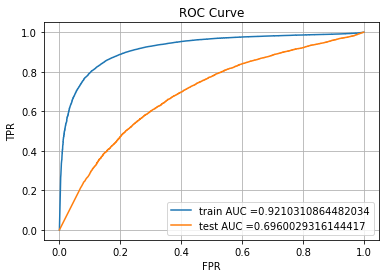

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
BOW_train_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(BOW_train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [26]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [27]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.7253942485776852 for threshold 0.24


In [28]:
from sklearn.metrics import confusion_matrix
conf_mat_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

<AxesSubplot:>

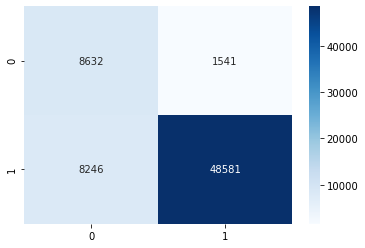

In [29]:
import seaborn as sns 
sns.heatmap(conf_mat_train, annot=True,fmt="d",cmap='Blues')

<AxesSubplot:>

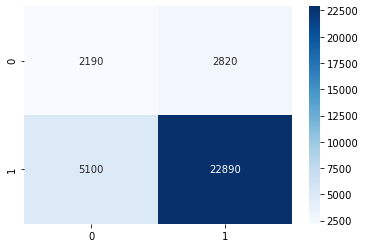

In [30]:
conf_mat_test  = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(conf_mat_test, annot=True,fmt="d",cmap='Blues')

In [31]:
feature_prob = NB.feature_log_prob_
sorted_feature_prob = feature_prob.argsort()

In [32]:
main_feature_list = []

for i in vectorizor.get_feature_names(): 
    main_feature_list.append(i)

In [33]:
main_feature_list.append('price')
main_feature_list.append('teacher_number_of_previously_posted_projects')

In [34]:
for i in vectorizor_ss.get_feature_names():
    main_feature_list.append(i)
    
for i in vectorizor_t_prefix.get_feature_names():
    main_feature_list.append(i)
    
for i in vectorizor_proj_grade.get_feature_names():
    main_feature_list.append(i)

for i in vectorizor_clean_cat.get_feature_names():
    main_feature_list.append(i)
    
for i in vectorizor_clean_subcat.get_feature_names():
    main_feature_list.append(i)

In [35]:
len(main_feature_list)

233565

In [36]:
X_tr.shape[1]

233565

In [65]:
top10_neg = pd.DataFrame({'NEGATIVE':[main_feature_list[i] for i in sorted_feature_prob[0][::-1][:20]]})
top10_neg

,NEGATIVE
0,students
1,school
2,learning
3,my
4,classroom
5,not
6,learn
7,they
8,help
9,the


In [66]:
top10_pos = pd.DataFrame({'POSITIVE':[main_feature_list[i] for i in sorted_feature_prob[1][::-1][:20]]})
top10_pos

,POSITIVE
0,students
1,school
2,my
3,learning
4,classroom
5,the
6,they
7,not
8,my students
9,learn


</br>SET2(PREPROCESSED EASSY(TFIDF) + NUMERICAL FEATURES + CATEGORICAL FEATURES)

In [39]:
#Stacking all features
X_tr_t = hstack((X_train_tfidf_eassy,X_train_pre_post,X_train_price,X_train_school,X_train_teacher_prefix,X_train_project_grade,X_train_clean_cat,X_train_clean_subcat)).tocsr()

X_te_t = hstack((X_test_tfidf_eassy,X_test_pre_post,X_test_price,X_test_school,X_test_teacher_prefix,X_test_project_grade,X_test_clean_cat,X_test_clean_subcat)).tocsr()

In [40]:
#hyperparameter tunning
param = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

NB_t = MultinomialNB(class_prior=[0.5,0.5])

clf = RandomizedSearchCV(NB_t, param, cv=10, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf.fit(X_tr_t,y_train)


RandomizedSearchCV(cv=10, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
                   n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0005, 0.0001, 0.005,
                                                  0.001, 0.05, 0.01, 0.1, 0.5,
                                                  1, 5, 10, 50, 100]},
                   return_train_score=True, scoring='roc_auc')

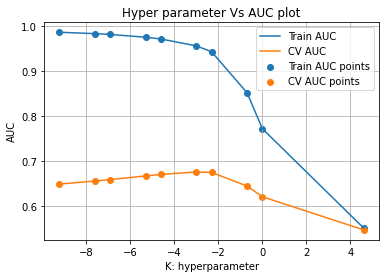

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.757077,0.181402,0.065627,0.022963,0.0001,{'alpha': 0.0001},0.656517,0.645945,0.648934,0.656006,...,0.986562,0.986371,0.986411,0.986159,0.985907,0.986817,0.986649,0.986762,0.986486,0.000276
5,0.565344,0.052168,0.053141,0.010486,0.0005,{'alpha': 0.0005},0.663351,0.652823,0.655943,0.663566,...,0.983486,0.983226,0.983269,0.982983,0.982713,0.983788,0.983649,0.983699,0.983385,0.000329
9,0.531285,0.039532,0.043753,0.011692,0.001,{'alpha': 0.001},0.666559,0.656177,0.659286,0.667099,...,0.981666,0.981381,0.981418,0.981116,0.980839,0.981998,0.981886,0.981882,0.981556,0.000355
3,0.573131,0.069012,0.054858,0.008682,0.005,{'alpha': 0.005},0.674385,0.664512,0.667594,0.675932,...,0.975520,0.975189,0.975187,0.974870,0.974572,0.975958,0.975953,0.975731,0.975399,0.000432
8,0.536130,0.036371,0.053127,0.012501,0.01,{'alpha': 0.01},0.677584,0.668142,0.671022,0.679797,...,0.971602,0.971255,0.971247,0.970905,0.970606,0.972126,0.972172,0.971820,0.971487,0.000479


In [41]:
import math
 
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K = [math.log(a) for a in results['param_alpha']]

plt.plot(K, train_auc, label='Train AUC') 
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [42]:
best_param_t = clf.best_params_ #BEST HYPER PARAMETER
best_param_t

{'alpha': 0.05}

In [43]:
NB_t = MultinomialNB(alpha = best_param_t['alpha'],class_prior=[0.5,0.5]) #Applying NB with best alpha
NB_t.fit(X_tr_t,y_train)

MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5])

In [44]:
train_predicted = NB_t.predict_proba(X_tr_t)
test_predicted = NB_t.predict_proba(X_te_t)
y_train_pred = train_predicted[:,1]
y_test_pred = test_predicted[:,1]

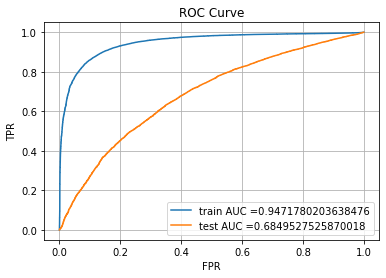

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

tfidf_train_auc = auc(train_fpr, train_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(tfidf_train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [46]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [47]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.7752877904632008 for threshold 0.468


In [48]:
from sklearn.metrics import confusion_matrix
conf_mat_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

<AxesSubplot:>

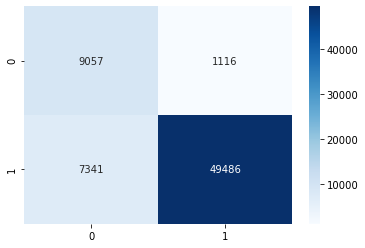

In [49]:
import seaborn as sns 
sns.heatmap(conf_mat_train, annot=True,fmt="d",cmap='Blues')

<AxesSubplot:>

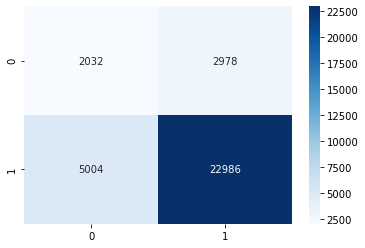

In [50]:
conf_mat_test  = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(conf_mat_test, annot=True,fmt="d",cmap='Blues')

In [51]:
feature_prob_t = NB_t.feature_log_prob_
sorted_feature_prob_t = feature_prob_t.argsort()

In [52]:
main_feature_list_t = []

for i in vectorizor.get_feature_names(): 
    main_feature_list_t.append(i)

In [53]:
main_feature_list_t.append('price')
main_feature_list_t.append('teacher_number_of_previously_posted_projects')

In [54]:
for i in vectorizor_ss.get_feature_names():
    main_feature_list_t.append(i)
    
for i in vectorizor_t_prefix.get_feature_names():
    main_feature_list_t.append(i)
    
for i in vectorizor_proj_grade.get_feature_names():
    main_feature_list_t.append(i)

for i in vectorizor_clean_cat.get_feature_names():
    main_feature_list_t.append(i)
    
for i in vectorizor_clean_subcat.get_feature_names():
    main_feature_list_t.append(i)

In [55]:
print(len(main_feature_list))
X_tr.shape[1]

233565


233565

In [67]:
top10_pos_t = pd.DataFrame({'POSITIVE':[main_feature_list_t[i] for i in sorted_feature_prob[1][::-1][:20]]})
top10_pos_t

,POSITIVE
0,students
1,school
2,my
3,learning
4,classroom
5,the
6,they
7,not
8,my students
9,learn


In [68]:
top10_neg_t = pd.DataFrame({'NEGATIVE':[main_feature_list_t[i] for i in sorted_feature_prob[0][::-1][:20]]})
top10_neg_t

,NEGATIVE
0,students
1,school
2,learning
3,my
4,classroom
5,not
6,learn
7,they
8,help
9,the


<h1>3. Summary</h1>

In [71]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter","AUC"]
x.add_row(["BOW","Naive Bayes",best_param['alpha'],BOW_train_auc])
x.add_row(["TFIDF","Naive Bayes",best_param_t['alpha'],tfidf_train_auc])

In [72]:
print(x)

+------------+-------------+-----------------+--------------------+
| Vectorizer |    Model    | Hyper Parameter |        AUC         |
+------------+-------------+-----------------+--------------------+
|    BOW     | Naive Bayes |        1        | 0.9210310864482034 |
|   TFIDF    | Naive Bayes |       0.05      | 0.9471780203638476 |
+------------+-------------+-----------------+--------------------+
